# Day 48: Training Neural Networks - Activation Functions and Optimizers

## Introduction

Welcome to Day 48 of our Machine Learning journey! Today, we dive deep into two critical components that make neural networks powerful: **activation functions** and **optimization algorithms**.

In the previous lessons, we explored the fundamentals of neural networks and how backpropagation enables learning. However, the choice of activation functions and optimizers can dramatically affect how well and how quickly your network learns. Understanding these components is essential for building effective deep learning models.

### Why This Topic Matters

Activation functions introduce non-linearity into neural networks, enabling them to learn complex patterns in data. Without activation functions, even a deep neural network would behave like a simple linear regression model. Optimizers, on the other hand, determine how the network updates its weights during training, directly impacting convergence speed and model performance.

### Learning Objectives

By the end of this lesson, you will be able to:

- Understand the role and importance of activation functions in neural networks
- Implement and compare different activation functions (Sigmoid, Tanh, ReLU, Leaky ReLU)
- Comprehend the mathematical foundation of optimization algorithms
- Implement various optimizers (SGD, Momentum, RMSprop, Adam) and understand their differences
- Apply appropriate activation functions and optimizers to real-world problems

## Part 1: Activation Functions

### What Are Activation Functions?

An activation function is a mathematical function applied to the weighted sum of inputs in a neuron. It determines whether and to what extent a neuron should be activated, introducing non-linearity into the network.

For a neuron receiving inputs $x_1, x_2, ..., x_n$ with corresponding weights $w_1, w_2, ..., w_n$ and bias $b$, the activation function $f$ is applied as follows:

$$a = f(z) = f(\sum_{i=1}^{n} w_i x_i + b)$$

where $z$ is the pre-activation value and $a$ is the activation (output) of the neuron.

### Why Non-linearity Matters

Without activation functions (or with only linear activation), stacking multiple layers would still result in a linear transformation:

$$f(W_2(W_1x + b_1) + b_2) = W_2W_1x + W_2b_1 + b_2 = Wx + b$$

This is mathematically equivalent to a single-layer network! Non-linear activation functions enable neural networks to approximate any continuous function, making them universal function approximators.

### Common Activation Functions

#### 1. Sigmoid Function

The sigmoid function squashes values between 0 and 1:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

**Derivative:**
$$\sigma'(z) = \sigma(z)(1 - \sigma(z))$$

**Pros:** Smooth gradient, output values bound between 0 and 1 (useful for probability interpretation)

**Cons:** Vanishing gradient problem for very high or low values, computationally expensive (exponential operation)

#### 2. Hyperbolic Tangent (Tanh)

Tanh is similar to sigmoid but outputs values between -1 and 1:

$$\tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}$$

**Derivative:**
$$\tanh'(z) = 1 - \tanh^2(z)$$

**Pros:** Zero-centered output (helps with convergence), stronger gradients than sigmoid

**Cons:** Still suffers from vanishing gradient problem

#### 3. Rectified Linear Unit (ReLU)

ReLU is the most popular activation function in deep learning:

$$\text{ReLU}(z) = \max(0, z)$$

**Derivative:**
$$\text{ReLU}'(z) = \begin{cases} 1 & \text{if } z > 0 \\ 0 & \text{if } z \leq 0 \end{cases}$$

**Pros:** Computationally efficient, does not saturate for positive values, helps with vanishing gradient

**Cons:** "Dying ReLU" problem - neurons can get stuck outputting zero

#### 4. Leaky ReLU

Leaky ReLU addresses the dying ReLU problem by allowing small negative values:

$$\text{LeakyReLU}(z) = \begin{cases} z & \text{if } z > 0 \\ \alpha z & \text{if } z \leq 0 \end{cases}$$

where $\alpha$ is a small constant (typically 0.01).

**Pros:** Solves dying ReLU problem, maintains computational efficiency

**Cons:** Inconsistent predictions for negative values

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
NumPy version: 2.3.4


In [2]:
# Define activation functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(z):
    return np.maximum(0, z)

def leaky_relu(z, alpha=0.01):
    return np.where(z > 0, z, alpha * z)

# Define derivatives
def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

def tanh_derivative(z):
    return 1 - np.tanh(z)**2

def relu_derivative(z):
    return np.where(z > 0, 1, 0)

def leaky_relu_derivative(z, alpha=0.01):
    return np.where(z > 0, 1, alpha)

print("Activation functions defined successfully!")

Activation functions defined successfully!


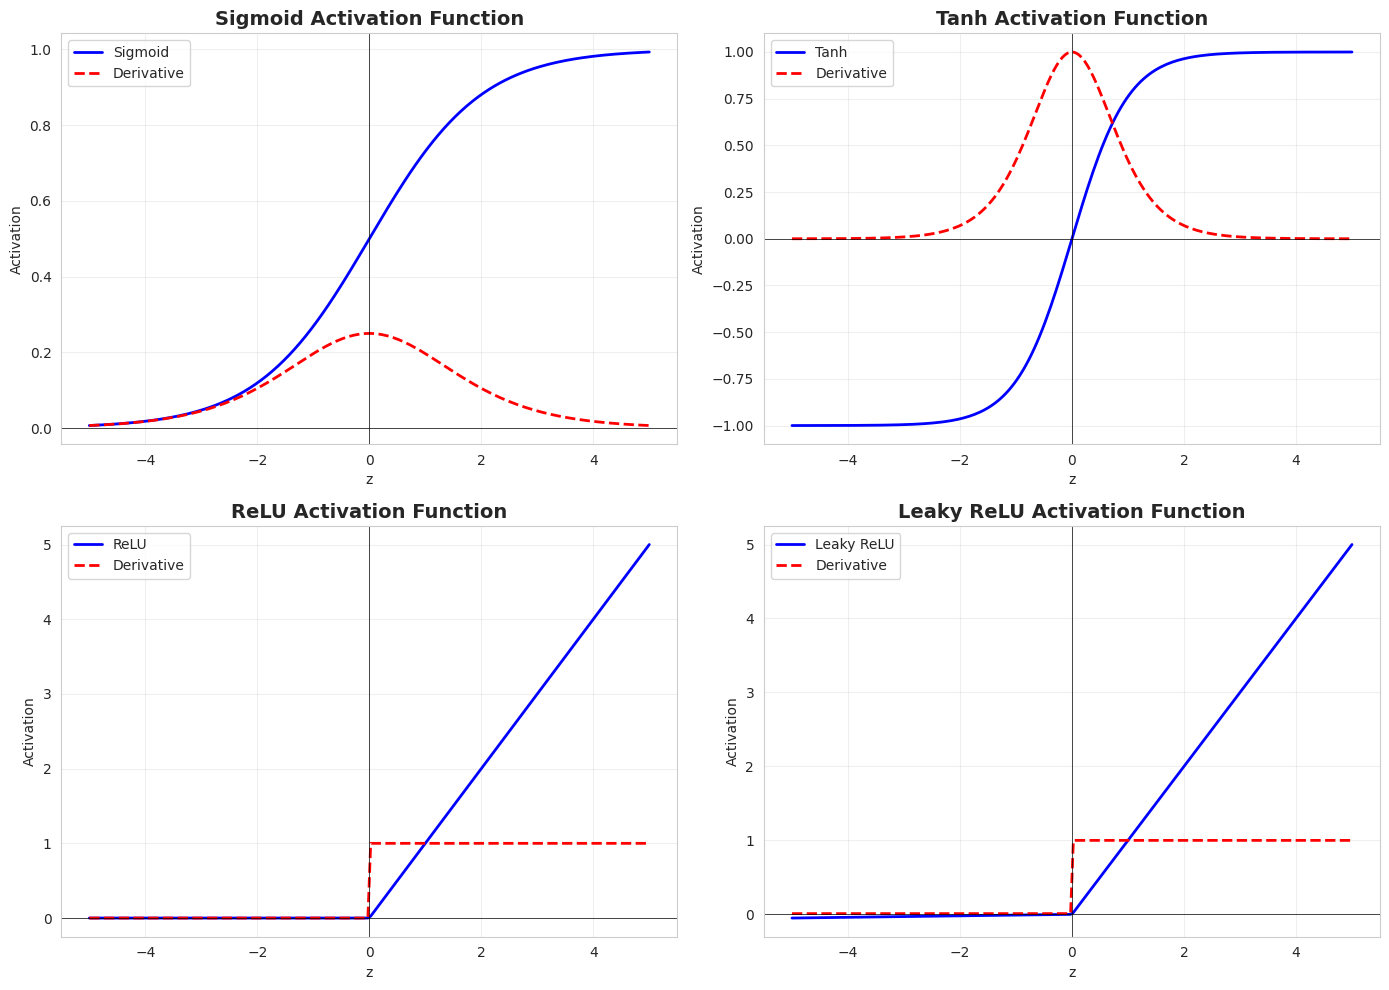


Key observations:
- Sigmoid: S-shaped curve, outputs between 0 and 1
- Tanh: S-shaped curve, outputs between -1 and 1 (zero-centered)
- ReLU: Linear for positive values, zero for negative values
- Leaky ReLU: Small slope for negative values, preventing 'dead neurons'


In [3]:
# Visualize activation functions
z = np.linspace(-5, 5, 200)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sigmoid
axes[0, 0].plot(z, sigmoid(z), 'b-', linewidth=2, label='Sigmoid')
axes[0, 0].plot(z, sigmoid_derivative(z), 'r--', linewidth=2, label='Derivative')
axes[0, 0].set_title('Sigmoid Activation Function', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('z')
axes[0, 0].set_ylabel('Activation')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
axes[0, 0].axvline(x=0, color='k', linestyle='-', linewidth=0.5)

# Tanh
axes[0, 1].plot(z, tanh(z), 'b-', linewidth=2, label='Tanh')
axes[0, 1].plot(z, tanh_derivative(z), 'r--', linewidth=2, label='Derivative')
axes[0, 1].set_title('Tanh Activation Function', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('z')
axes[0, 1].set_ylabel('Activation')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
axes[0, 1].axvline(x=0, color='k', linestyle='-', linewidth=0.5)

# ReLU
axes[1, 0].plot(z, relu(z), 'b-', linewidth=2, label='ReLU')
axes[1, 0].plot(z, relu_derivative(z), 'r--', linewidth=2, label='Derivative')
axes[1, 0].set_title('ReLU Activation Function', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('z')
axes[1, 0].set_ylabel('Activation')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
axes[1, 0].axvline(x=0, color='k', linestyle='-', linewidth=0.5)

# Leaky ReLU
axes[1, 1].plot(z, leaky_relu(z), 'b-', linewidth=2, label='Leaky ReLU')
axes[1, 1].plot(z, leaky_relu_derivative(z), 'r--', linewidth=2, label='Derivative')
axes[1, 1].set_title('Leaky ReLU Activation Function', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('z')
axes[1, 1].set_ylabel('Activation')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=0, color='k', linestyle='-', linewidth=0.5)
axes[1, 1].axvline(x=0, color='k', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

print("\nKey observations:")
print("- Sigmoid: S-shaped curve, outputs between 0 and 1")
print("- Tanh: S-shaped curve, outputs between -1 and 1 (zero-centered)")
print("- ReLU: Linear for positive values, zero for negative values")
print("- Leaky ReLU: Small slope for negative values, preventing 'dead neurons'")

## Part 2: Optimization Algorithms

### The Role of Optimizers

During training, neural networks learn by minimizing a loss function $L(\theta)$, where $\theta$ represents all the parameters (weights and biases). Optimization algorithms determine how to update these parameters to reduce the loss.

The general update rule is:

$$\theta_{t+1} = \theta_t - \eta \cdot \nabla_\theta L(\theta_t)$$

where:
- $\theta_t$ is the parameter at iteration $t$
- $\eta$ is the learning rate
- $\nabla_\theta L(\theta_t)$ is the gradient of the loss with respect to parameters

### Common Optimization Algorithms

#### 1. Stochastic Gradient Descent (SGD)

The simplest optimizer, SGD updates parameters using the gradient:

$$\theta_{t+1} = \theta_t - \eta \nabla_\theta L(\theta_t)$$

**Pros:** Simple, memory efficient

**Cons:** Can be slow to converge, sensitive to learning rate, can get stuck in local minima

#### 2. SGD with Momentum

Momentum accelerates SGD by accumulating a velocity vector:

$$v_t = \beta v_{t-1} + \nabla_\theta L(\theta_t)$$
$$\theta_{t+1} = \theta_t - \eta v_t$$

where $\beta$ is the momentum coefficient (typically 0.9).

**Pros:** Faster convergence, helps escape local minima

**Cons:** Introduces additional hyperparameter

#### 3. RMSprop (Root Mean Square Propagation)

RMSprop adapts the learning rate for each parameter:

$$E[g^2]_t = \beta E[g^2]_{t-1} + (1-\beta) g_t^2$$
$$\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_t$$

where $g_t = \nabla_\theta L(\theta_t)$ and $\epsilon$ is a small constant for numerical stability.

**Pros:** Adapts learning rate per parameter, works well with RNNs

**Cons:** Still requires manual learning rate tuning

#### 4. Adam (Adaptive Moment Estimation)

Adam combines ideas from Momentum and RMSprop:

$$m_t = \beta_1 m_{t-1} + (1-\beta_1) g_t$$
$$v_t = \beta_2 v_{t-1} + (1-\beta_2) g_t^2$$

Bias correction:
$$\hat{m}_t = \frac{m_t}{1-\beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1-\beta_2^t}$$

Parameter update:
$$\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t$$

Common values: $\beta_1 = 0.9$, $\beta_2 = 0.999$, $\epsilon = 10^{-8}$

**Pros:** Generally works well with default parameters, fast convergence, handles sparse gradients

**Cons:** May not converge in some settings, higher memory usage

### Visualizing Optimizer Behavior

Let's visualize how different optimizers navigate a loss landscape.

In [4]:
# Define a simple 2D loss function (Rosenbrock function)
def rosenbrock(x, y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

def rosenbrock_gradient(x, y, a=1, b=100):
    dx = -2*(a - x) - 4*b*x*(y - x**2)
    dy = 2*b*(y - x**2)
    return np.array([dx, dy])

# Create loss landscape
x_range = np.linspace(-2, 2, 400)
y_range = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = rosenbrock(X, Y)

print("Loss landscape created for visualization")
print(f"Minimum at: (1, 1) with loss = {rosenbrock(1, 1):.4f}")

Loss landscape created for visualization
Minimum at: (1, 1) with loss = 0.0000


In [5]:
# Implement optimizers from scratch
class SGD:
    def __init__(self, lr=0.001):
        self.lr = lr
    
    def update(self, params, grads):
        return params - self.lr * grads

class Momentum:
    def __init__(self, lr=0.001, beta=0.9):
        self.lr = lr
        self.beta = beta
        self.v = None
    
    def update(self, params, grads):
        if self.v is None:
            self.v = np.zeros_like(params)
        self.v = self.beta * self.v + grads
        return params - self.lr * self.v

class RMSprop:
    def __init__(self, lr=0.001, beta=0.9, epsilon=1e-8):
        self.lr = lr
        self.beta = beta
        self.epsilon = epsilon
        self.s = None
    
    def update(self, params, grads):
        if self.s is None:
            self.s = np.zeros_like(params)
        self.s = self.beta * self.s + (1 - self.beta) * grads**2
        return params - self.lr * grads / (np.sqrt(self.s) + self.epsilon)

class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0
    
    def update(self, params, grads):
        if self.m is None:
            self.m = np.zeros_like(params)
            self.v = np.zeros_like(params)
        
        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grads
        self.v = self.beta2 * self.v + (1 - self.beta2) * grads**2
        
        m_hat = self.m / (1 - self.beta1**self.t)
        v_hat = self.v / (1 - self.beta2**self.t)
        
        return params - self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)

print("Optimizers implemented successfully!")

Optimizers implemented successfully!


In [6]:
# Run optimization with different optimizers
def optimize(optimizer, start_point, n_iterations=200):
    path = [start_point.copy()]
    params = start_point.copy()
    
    for i in range(n_iterations):
        grads = rosenbrock_gradient(params[0], params[1])
        params = optimizer.update(params, grads)
        path.append(params.copy())
    
    return np.array(path)

# Starting point
start = np.array([-1.5, 2.5])

# Run different optimizers
optimizers = {
    'SGD': SGD(lr=0.0001),
    'Momentum': Momentum(lr=0.0001, beta=0.9),
    'RMSprop': RMSprop(lr=0.001, beta=0.9),
    'Adam': Adam(lr=0.001)
}

paths = {}
for name, opt in optimizers.items():
    paths[name] = optimize(opt, start, n_iterations=200)
    final_point = paths[name][-1]
    final_loss = rosenbrock(final_point[0], final_point[1])
    print(f"{name:10s} - Final position: ({final_point[0]:.4f}, {final_point[1]:.4f}), Loss: {final_loss:.6f}")

SGD        - Final position: (-1.5619, 2.4469), Loss: 6.568817
Momentum   - Final position: (-1.4744, 2.1814), Loss: 6.128358
RMSprop    - Final position: (-1.5242, 2.3321), Loss: 6.379525
Adam       - Final position: (-1.5574, 2.4319), Loss: 6.544353


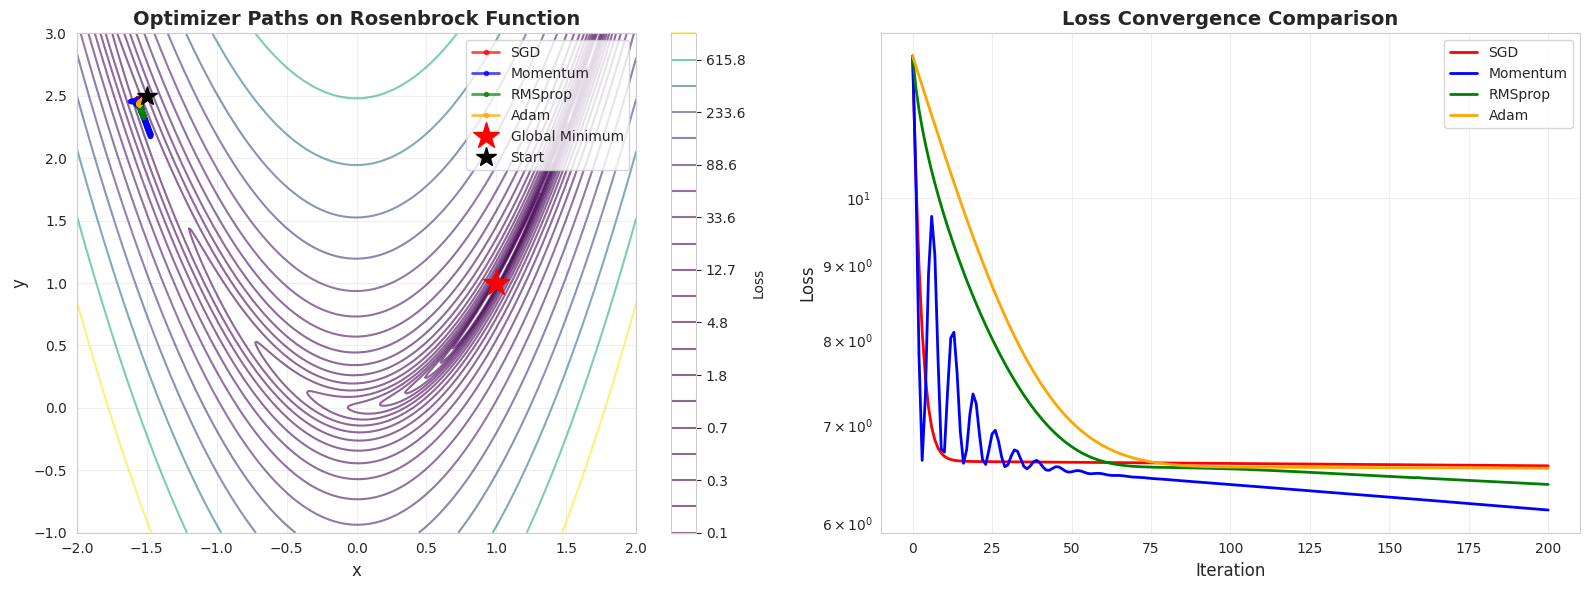


Observations:
- SGD: Slow and steady, may get stuck
- Momentum: Faster, but can overshoot
- RMSprop: Adapts step size, more stable
- Adam: Generally fastest convergence with good stability


In [7]:
# Visualize optimizer paths
plt.figure(figsize=(16, 6))

# Left plot: Contour with paths
plt.subplot(1, 2, 1)
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 20), cmap='viridis', alpha=0.6)
plt.colorbar(label='Loss')

colors = {'SGD': 'red', 'Momentum': 'blue', 'RMSprop': 'green', 'Adam': 'orange'}
for name, path in paths.items():
    plt.plot(path[:, 0], path[:, 1], 'o-', color=colors[name], 
             label=name, linewidth=2, markersize=3, alpha=0.7)

plt.plot(1, 1, 'r*', markersize=20, label='Global Minimum')
plt.plot(start[0], start[1], 'k*', markersize=15, label='Start')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Optimizer Paths on Rosenbrock Function', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

# Right plot: Loss over iterations
plt.subplot(1, 2, 2)
for name, path in paths.items():
    losses = [rosenbrock(p[0], p[1]) for p in path]
    plt.plot(losses, color=colors[name], label=name, linewidth=2)

plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Loss Convergence Comparison', fontsize=14, fontweight='bold')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservations:")
print("- SGD: Slow and steady, may get stuck")
print("- Momentum: Faster, but can overshoot")
print("- RMSprop: Adapts step size, more stable")
print("- Adam: Generally fastest convergence with good stability")

## Part 3: Practical Implementation with Real Data

Now let's apply what we've learned by building a neural network from scratch and comparing different activation functions and optimizers on a real classification problem.

Training samples: 800
Test samples: 200
Features: 2


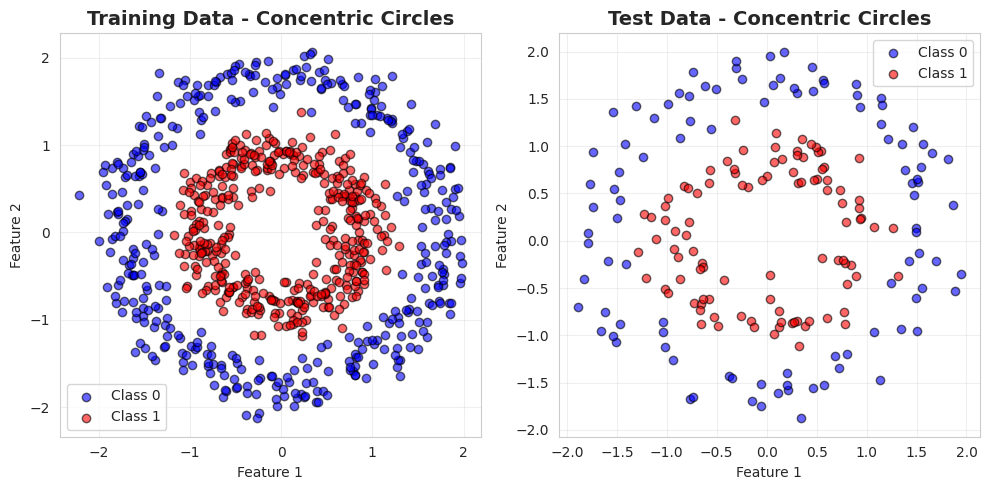


This is a non-linearly separable dataset - perfect for testing neural networks!


In [8]:
# Generate a non-linear classification dataset
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Features: {X_train.shape[1]}")

# Visualize the dataset
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], 
            c='blue', label='Class 0', alpha=0.6, edgecolors='k')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], 
            c='red', label='Class 1', alpha=0.6, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data - Concentric Circles', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], 
            c='blue', label='Class 0', alpha=0.6, edgecolors='k')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], 
            c='red', label='Class 1', alpha=0.6, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Data - Concentric Circles', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nThis is a non-linearly separable dataset - perfect for testing neural networks!")

In [9]:
# Simple Neural Network class
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation='relu'):
        # Initialize weights with He initialization for ReLU, Xavier for others
        if activation == 'relu':
            self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2.0 / input_size)
            self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2.0 / hidden_size)
        else:
            self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1.0 / input_size)
            self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1.0 / hidden_size)
        
        self.b1 = np.zeros((1, hidden_size))
        self.b2 = np.zeros((1, output_size))
        self.activation = activation
        
    def forward(self, X):
        # Forward pass
        self.z1 = np.dot(X, self.W1) + self.b1
        
        # Apply activation function
        if self.activation == 'sigmoid':
            self.a1 = sigmoid(self.z1)
        elif self.activation == 'tanh':
            self.a1 = tanh(self.z1)
        elif self.activation == 'relu':
            self.a1 = relu(self.z1)
        elif self.activation == 'leaky_relu':
            self.a1 = leaky_relu(self.z1)
        
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)  # Output layer uses sigmoid for binary classification
        
        return self.a2
    
    def backward(self, X, y, output):
        m = X.shape[0]
        
        # Backward pass
        dz2 = output - y.reshape(-1, 1)
        dW2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        da1 = np.dot(dz2, self.W2.T)
        
        # Apply derivative of activation function
        if self.activation == 'sigmoid':
            dz1 = da1 * sigmoid_derivative(self.z1)
        elif self.activation == 'tanh':
            dz1 = da1 * tanh_derivative(self.z1)
        elif self.activation == 'relu':
            dz1 = da1 * relu_derivative(self.z1)
        elif self.activation == 'leaky_relu':
            dz1 = da1 * leaky_relu_derivative(self.z1)
        
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        return {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}
    
    def compute_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        # Binary cross-entropy loss
        loss = -np.mean(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))
        return loss
    
    def predict(self, X):
        output = self.forward(X)
        return (output > 0.5).astype(int).flatten()

print("Neural Network class implemented successfully!")

Neural Network class implemented successfully!


In [10]:
# Training function
def train_network(X_train, y_train, X_test, y_test, activation='relu', 
                 optimizer_name='adam', lr=0.01, epochs=100, hidden_size=10):
    
    # Initialize network
    nn = SimpleNeuralNetwork(X_train.shape[1], hidden_size, 1, activation)
    
    # Initialize optimizer
    if optimizer_name == 'sgd':
        optimizers = {
            'W1': SGD(lr), 'b1': SGD(lr),
            'W2': SGD(lr), 'b2': SGD(lr)
        }
    elif optimizer_name == 'momentum':
        optimizers = {
            'W1': Momentum(lr), 'b1': Momentum(lr),
            'W2': Momentum(lr), 'b2': Momentum(lr)
        }
    elif optimizer_name == 'rmsprop':
        optimizers = {
            'W1': RMSprop(lr), 'b1': RMSprop(lr),
            'W2': RMSprop(lr), 'b2': RMSprop(lr)
        }
    elif optimizer_name == 'adam':
        optimizers = {
            'W1': Adam(lr), 'b1': Adam(lr),
            'W2': Adam(lr), 'b2': Adam(lr)
        }
    
    train_losses = []
    test_losses = []
    train_accs = []
    test_accs = []
    
    for epoch in range(epochs):
        # Forward pass
        output = nn.forward(X_train)
        
        # Compute loss
        train_loss = nn.compute_loss(y_train, output)
        
        # Backward pass
        grads = nn.backward(X_train, y_train, output)
        
        # Update parameters
        nn.W1 = optimizers['W1'].update(nn.W1, grads['dW1'])
        nn.b1 = optimizers['b1'].update(nn.b1, grads['db1'])
        nn.W2 = optimizers['W2'].update(nn.W2, grads['dW2'])
        nn.b2 = optimizers['b2'].update(nn.b2, grads['db2'])
        
        # Evaluate
        train_pred = nn.predict(X_train)
        test_pred = nn.predict(X_test)
        
        train_acc = np.mean(train_pred == y_train)
        test_acc = np.mean(test_pred == y_test)
        
        test_output = nn.forward(X_test)
        test_loss = nn.compute_loss(y_test, test_output)
        
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        train_accs.append(train_acc)
        test_accs.append(test_acc)
        
        if (epoch + 1) % 20 == 0:
            print(f"Epoch {epoch+1}/{epochs} - Loss: {train_loss:.4f}, "
                  f"Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")
    
    return nn, train_losses, test_losses, train_accs, test_accs

print("Training function defined successfully!")

Training function defined successfully!


### Experiment 1: Comparing Activation Functions

In [11]:
# Compare different activation functions
activations = ['sigmoid', 'tanh', 'relu', 'leaky_relu']
results_activation = {}

print("=" * 60)
print("Comparing Activation Functions (using Adam optimizer)")
print("=" * 60)

for act in activations:
    print(f"\nTraining with {act.upper()} activation:")
    nn, train_loss, test_loss, train_acc, test_acc = train_network(
        X_train, y_train, X_test, y_test,
        activation=act, optimizer_name='adam', lr=0.01, epochs=100, hidden_size=20
    )
    results_activation[act] = {
        'model': nn,
        'train_loss': train_loss,
        'test_loss': test_loss,
        'train_acc': train_acc,
        'test_acc': test_acc
    }

print("\n" + "=" * 60)
print("Activation function comparison complete!")
print("=" * 60)

Comparing Activation Functions (using Adam optimizer)

Training with SIGMOID activation:
Epoch 20/100 - Loss: 0.6939, Train Acc: 0.5663, Test Acc: 0.4950
Epoch 40/100 - Loss: 0.6940, Train Acc: 0.7087, Test Acc: 0.6500
Epoch 60/100 - Loss: 0.6990, Train Acc: 0.8988, Test Acc: 0.8600


Epoch 80/100 - Loss: 0.7252, Train Acc: 0.9563, Test Acc: 0.9250
Epoch 100/100 - Loss: 0.7836, Train Acc: 0.9875, Test Acc: 0.9650

Training with TANH activation:
Epoch 20/100 - Loss: 0.6964, Train Acc: 0.6362, Test Acc: 0.5950
Epoch 40/100 - Loss: 0.7030, Train Acc: 0.7100, Test Acc: 0.6400


Epoch 60/100 - Loss: 0.7295, Train Acc: 0.8775, Test Acc: 0.8300
Epoch 80/100 - Loss: 0.7749, Train Acc: 0.9825, Test Acc: 0.9450
Epoch 100/100 - Loss: 0.8760, Train Acc: 0.9962, Test Acc: 0.9900

Training with RELU activation:
Epoch 20/100 - Loss: 0.7846, Train Acc: 0.4625, Test Acc: 0.4700


Epoch 40/100 - Loss: 0.7345, Train Acc: 0.5750, Test Acc: 0.5400
Epoch 60/100 - Loss: 0.7476, Train Acc: 0.6975, Test Acc: 0.6550
Epoch 80/100 - Loss: 0.7710, Train Acc: 0.9200, Test Acc: 0.8850
Epoch 100/100 - Loss: 0.8382, Train Acc: 0.9812, Test Acc: 0.9550

Training with LEAKY_RELU activation:


Epoch 20/100 - Loss: 0.7356, Train Acc: 0.6700, Test Acc: 0.6400
Epoch 40/100 - Loss: 0.7778, Train Acc: 0.9113, Test Acc: 0.8700
Epoch 60/100 - Loss: 0.9042, Train Acc: 0.9875, Test Acc: 0.9550
Epoch 80/100 - Loss: 1.1848, Train Acc: 0.9950, Test Acc: 0.9650


Epoch 100/100 - Loss: 1.5031, Train Acc: 0.9950, Test Acc: 0.9650

Activation function comparison complete!


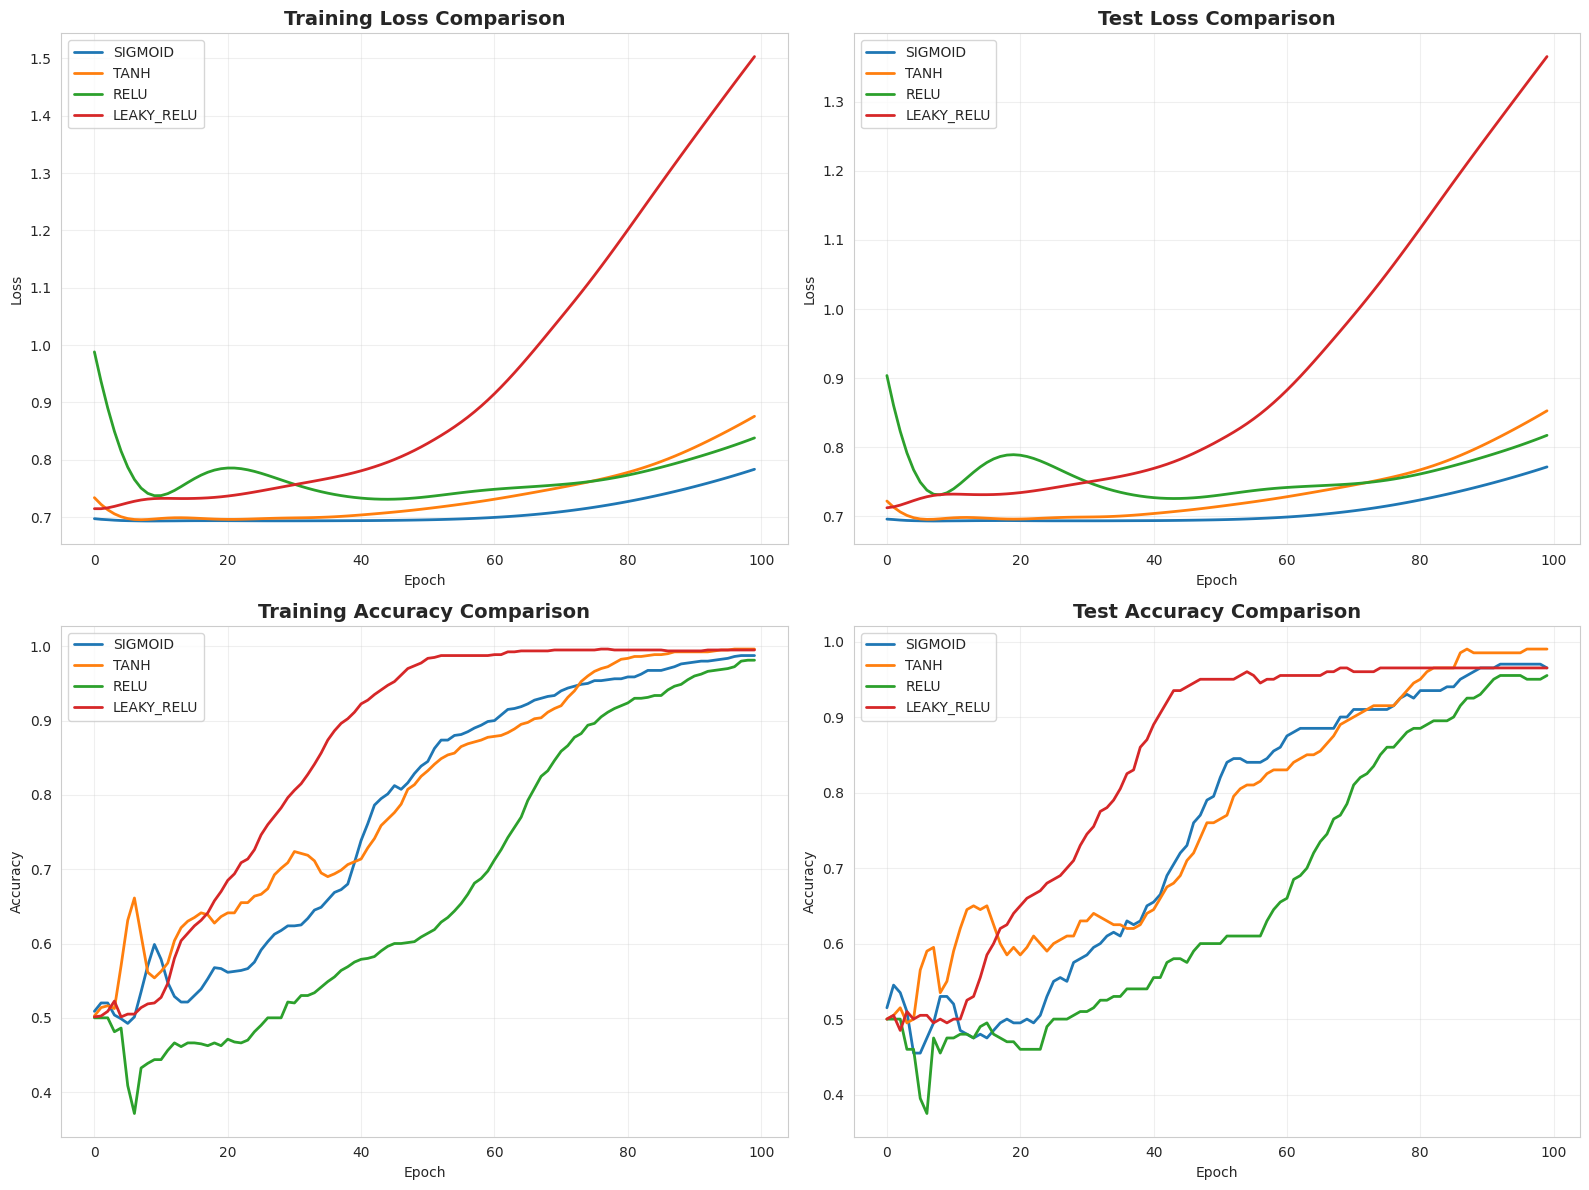


Final Test Accuracy by Activation Function:
----------------------------------------
SIGMOID     : 0.9650 (96.50%)
TANH        : 0.9900 (99.00%)
RELU        : 0.9550 (95.50%)
LEAKY_RELU  : 0.9650 (96.50%)


In [12]:
# Visualize activation function comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Loss comparison
axes[0, 0].set_title('Training Loss Comparison', fontsize=14, fontweight='bold')
for act in activations:
    axes[0, 0].plot(results_activation[act]['train_loss'], label=act.upper(), linewidth=2)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].set_title('Test Loss Comparison', fontsize=14, fontweight='bold')
for act in activations:
    axes[0, 1].plot(results_activation[act]['test_loss'], label=act.upper(), linewidth=2)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Accuracy comparison
axes[1, 0].set_title('Training Accuracy Comparison', fontsize=14, fontweight='bold')
for act in activations:
    axes[1, 0].plot(results_activation[act]['train_acc'], label=act.upper(), linewidth=2)
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].set_title('Test Accuracy Comparison', fontsize=14, fontweight='bold')
for act in activations:
    axes[1, 1].plot(results_activation[act]['test_acc'], label=act.upper(), linewidth=2)
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final results
print("\nFinal Test Accuracy by Activation Function:")
print("-" * 40)
for act in activations:
    final_acc = results_activation[act]['test_acc'][-1]
    print(f"{act.upper():12s}: {final_acc:.4f} ({final_acc*100:.2f}%)")

### Experiment 2: Comparing Optimizers

In [13]:
# Compare different optimizers
optimizer_names = ['sgd', 'momentum', 'rmsprop', 'adam']
results_optimizer = {}

print("=" * 60)
print("Comparing Optimizers (using ReLU activation)")
print("=" * 60)

for opt in optimizer_names:
    print(f"\nTraining with {opt.upper()} optimizer:")
    nn, train_loss, test_loss, train_acc, test_acc = train_network(
        X_train, y_train, X_test, y_test,
        activation='relu', optimizer_name=opt, lr=0.01, epochs=100, hidden_size=20
    )
    results_optimizer[opt] = {
        'model': nn,
        'train_loss': train_loss,
        'test_loss': test_loss,
        'train_acc': train_acc,
        'test_acc': test_acc
    }

print("\n" + "=" * 60)
print("Optimizer comparison complete!")
print("=" * 60)

Comparing Optimizers (using ReLU activation)

Training with SGD optimizer:
Epoch 20/100 - Loss: 0.7318, Train Acc: 0.4888, Test Acc: 0.5000
Epoch 40/100 - Loss: 0.7170, Train Acc: 0.4950, Test Acc: 0.5250
Epoch 60/100 - Loss: 0.7234, Train Acc: 0.4875, Test Acc: 0.5250


Epoch 80/100 - Loss: 0.7308, Train Acc: 0.4738, Test Acc: 0.5200
Epoch 100/100 - Loss: 0.7359, Train Acc: 0.5012, Test Acc: 0.5050

Training with MOMENTUM optimizer:
Epoch 20/100 - Loss: 0.7418, Train Acc: 0.5162, Test Acc: 0.5050
Epoch 40/100 - Loss: 0.7334, Train Acc: 0.5913, Test Acc: 0.5850


Epoch 60/100 - Loss: 0.7367, Train Acc: 0.7150, Test Acc: 0.6850
Epoch 80/100 - Loss: 0.7421, Train Acc: 0.8237, Test Acc: 0.7750
Epoch 100/100 - Loss: 0.7510, Train Acc: 0.8900, Test Acc: 0.8250

Training with RMSPROP optimizer:
Epoch 20/100 - Loss: 0.7517, Train Acc: 0.7300, Test Acc: 0.7100


Epoch 40/100 - Loss: 0.8333, Train Acc: 0.9637, Test Acc: 0.9250
Epoch 60/100 - Loss: 1.0407, Train Acc: 0.9938, Test Acc: 0.9800
Epoch 80/100 - Loss: 1.3535, Train Acc: 0.9950, Test Acc: 0.9800
Epoch 100/100 - Loss: 1.7525, Train Acc: 0.9950, Test Acc: 0.9850

Training with ADAM optimizer:


Epoch 20/100 - Loss: 0.7739, Train Acc: 0.5700, Test Acc: 0.5550
Epoch 40/100 - Loss: 0.7471, Train Acc: 0.7375, Test Acc: 0.7150
Epoch 60/100 - Loss: 0.7900, Train Acc: 0.9050, Test Acc: 0.8700
Epoch 80/100 - Loss: 0.8779, Train Acc: 0.9788, Test Acc: 0.9500


Epoch 100/100 - Loss: 1.0262, Train Acc: 0.9950, Test Acc: 0.9550

Optimizer comparison complete!


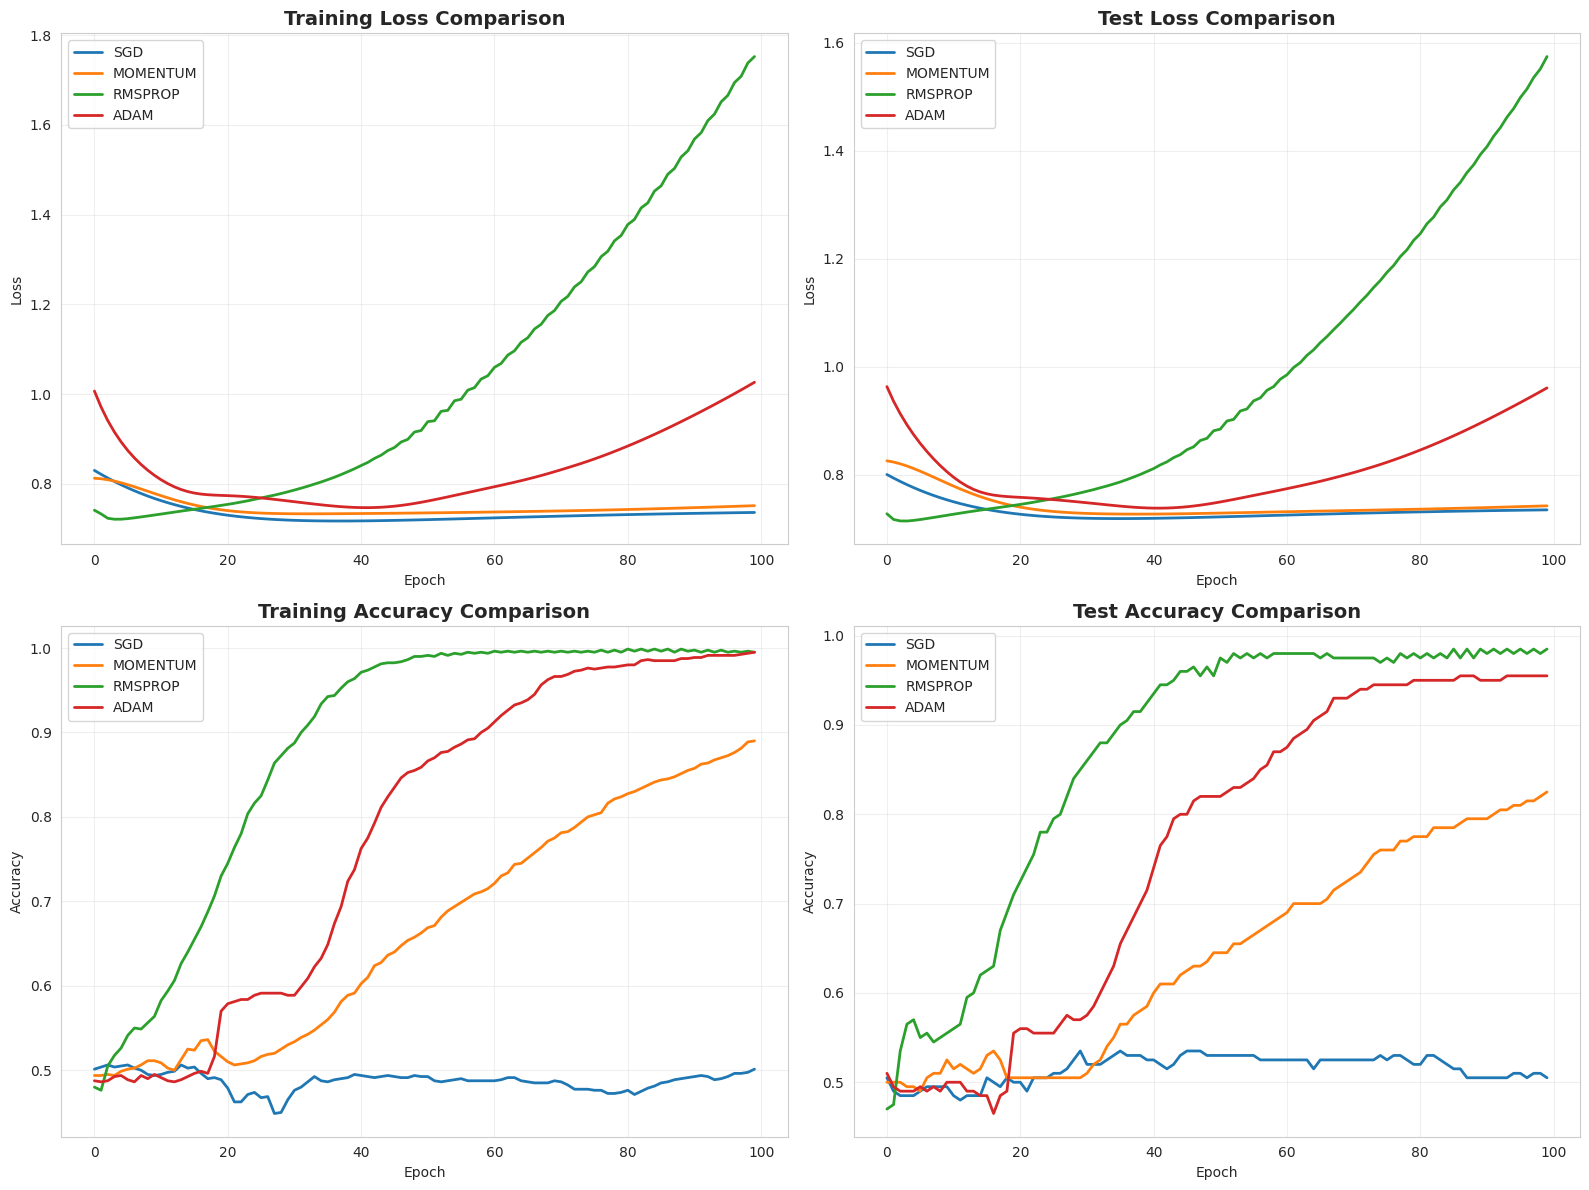


Final Test Accuracy by Optimizer:
----------------------------------------
SGD         : 0.5050 (50.50%)
MOMENTUM    : 0.8250 (82.50%)
RMSPROP     : 0.9850 (98.50%)
ADAM        : 0.9550 (95.50%)


In [14]:
# Visualize optimizer comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Loss comparison
axes[0, 0].set_title('Training Loss Comparison', fontsize=14, fontweight='bold')
for opt in optimizer_names:
    axes[0, 0].plot(results_optimizer[opt]['train_loss'], label=opt.upper(), linewidth=2)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].set_title('Test Loss Comparison', fontsize=14, fontweight='bold')
for opt in optimizer_names:
    axes[0, 1].plot(results_optimizer[opt]['test_loss'], label=opt.upper(), linewidth=2)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Accuracy comparison
axes[1, 0].set_title('Training Accuracy Comparison', fontsize=14, fontweight='bold')
for opt in optimizer_names:
    axes[1, 0].plot(results_optimizer[opt]['train_acc'], label=opt.upper(), linewidth=2)
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].set_title('Test Accuracy Comparison', fontsize=14, fontweight='bold')
for opt in optimizer_names:
    axes[1, 1].plot(results_optimizer[opt]['test_acc'], label=opt.upper(), linewidth=2)
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final results
print("\nFinal Test Accuracy by Optimizer:")
print("-" * 40)
for opt in optimizer_names:
    final_acc = results_optimizer[opt]['test_acc'][-1]
    print(f"{opt.upper():12s}: {final_acc:.4f} ({final_acc*100:.2f}%)")

### Visualizing Decision Boundaries

Let's visualize how our best-performing model creates decision boundaries for the concentric circles problem.

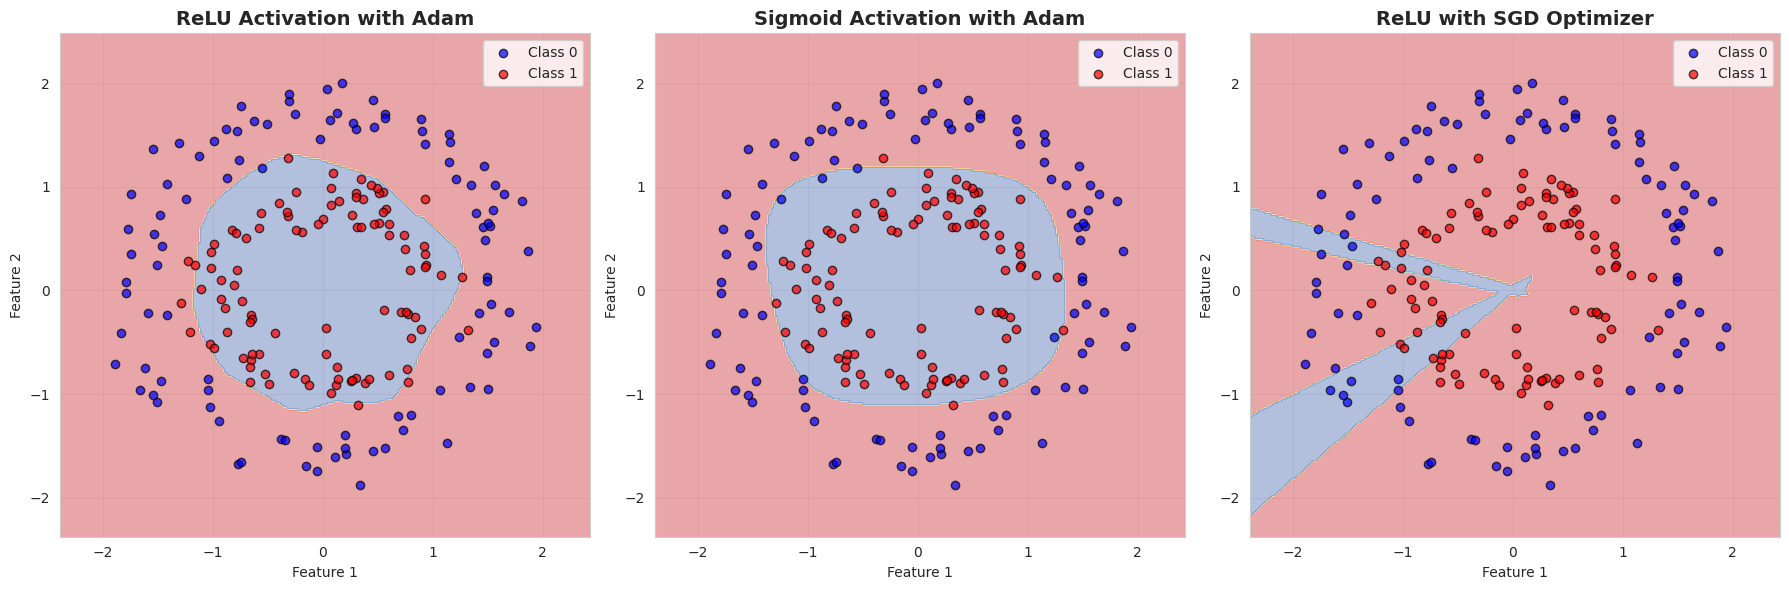

Decision boundaries visualized successfully!

Notice how different configurations create different decision boundaries.
ReLU with Adam typically provides the best separation for this problem.


In [15]:
# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    # Create a mesh
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict on mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    plt.scatter(X[y==0, 0], X[y==0, 1], c='blue', label='Class 0', 
                edgecolors='k', alpha=0.7)
    plt.scatter(X[y==1, 0], X[y==1, 1], c='red', label='Class 1', 
                edgecolors='k', alpha=0.7)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

# Plot decision boundaries for different configurations
fig = plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plot_decision_boundary(results_activation['relu']['model'], X_test, y_test,
                      'ReLU Activation with Adam')

plt.subplot(1, 3, 2)
plot_decision_boundary(results_activation['sigmoid']['model'], X_test, y_test,
                      'Sigmoid Activation with Adam')

plt.subplot(1, 3, 3)
plot_decision_boundary(results_optimizer['sgd']['model'], X_test, y_test,
                      'ReLU with SGD Optimizer')

plt.tight_layout()
plt.show()

print("Decision boundaries visualized successfully!")
print("\nNotice how different configurations create different decision boundaries.")
print("ReLU with Adam typically provides the best separation for this problem.")

## Key Takeaways

Congratulations on completing Day 48! Here are the essential points to remember:

### Activation Functions:
- **Non-linearity is essential** - Without activation functions, neural networks would be equivalent to linear models
- **ReLU is the default choice** - Fast, efficient, and works well for most problems
- **Sigmoid and Tanh** - Useful for specific cases (output layers, RNNs) but suffer from vanishing gradients
- **Leaky ReLU** - Addresses the dying ReLU problem while maintaining efficiency
- **Choice matters** - Different activation functions can significantly impact model performance

### Optimizers:
- **SGD** - Simple but can be slow; good baseline for comparison
- **Momentum** - Accelerates learning and helps escape local minima
- **RMSprop** - Adapts learning rates per parameter; good for RNNs
- **Adam** - Generally the best starting point; combines benefits of Momentum and RMSprop
- **Learning rate is crucial** - Too high causes instability, too low causes slow convergence

### Practical Guidelines:
- Start with **ReLU activation** and **Adam optimizer** as defaults
- Use **He initialization** for ReLU, **Xavier/Glorot** for sigmoid/tanh
- Monitor both training and validation metrics to detect overfitting
- Experiment with different configurations based on your specific problem
- Understanding these fundamentals is crucial before moving to deep learning frameworks

## Further Resources

To deepen your understanding of neural network training, activation functions, and optimizers:

### Academic Papers:
1. **"Delving Deep into Rectifiers"** by He et al. (2015) - Understanding ReLU and initialization
   - https://arxiv.org/abs/1502.01852

2. **"Adam: A Method for Stochastic Optimization"** by Kingma & Ba (2014)
   - https://arxiv.org/abs/1412.6980

3. **"On the importance of initialization and momentum in deep learning"** by Sutskever et al. (2013)
   - http://proceedings.mlr.press/v28/sutskever13.html

### Online Resources:
4. **CS231n: Convolutional Neural Networks for Visual Recognition** - Stanford University
   - Excellent lecture notes on neural networks, activation functions, and optimization
   - http://cs231n.github.io/neural-networks-1/

5. **Sebastian Ruder's Blog: "An overview of gradient descent optimization algorithms"**
   - Comprehensive comparison of different optimizers
   - https://ruder.io/optimizing-gradient-descent/

6. **Deep Learning Book** by Goodfellow, Bengio, and Courville
   - Chapter 6 (Deep Feedforward Networks) and Chapter 8 (Optimization)
   - https://www.deeplearningbook.org/

### Practical Tutorials:
7. **PyTorch Documentation** - Activation Functions and Optimizers
   - https://pytorch.org/docs/stable/nn.html#non-linear-activations
   - https://pytorch.org/docs/stable/optim.html

8. **TensorFlow/Keras Guide** - Understanding layers and optimizers
   - https://www.tensorflow.org/guide/keras/sequential_model

### Next Steps:
- Experiment with different activation functions and optimizers on your own datasets
- Study regularization techniques (Dropout, Batch Normalization) - coming in the next lesson!
- Explore advanced optimizers like AdamW, Lookahead, and LAMB
- Learn about learning rate scheduling and adaptive learning rates

## Hands-On Exercise

### Challenge: Tune Your Neural Network

Now it's your turn! Try the following exercises to solidify your understanding:

1. **Experiment with learning rates**: Try training with learning rates of 0.001, 0.01, 0.1, and 1.0. Which works best?

2. **Network architecture**: Change the `hidden_size` parameter. How does network width affect performance?

3. **Different dataset**: Load a different dataset from sklearn (e.g., `make_moons`, `make_classification`) and test different activation-optimizer combinations.

4. **Implement a new activation function**: Try implementing the **ELU (Exponential Linear Unit)** activation function:
   $$\text{ELU}(z) = \begin{cases} z & \text{if } z > 0 \\ \alpha(e^z - 1) & \text{if } z \leq 0 \end{cases}$$

5. **Visualize learning dynamics**: Plot how the weights change over time for different optimizers.

Use the code cells below to experiment:

In [16]:
# Your experimentation code here
# Try different configurations and observe the results

# Example: Test different learning rates
learning_rates = [0.001, 0.01, 0.1]

print("Experimenting with different learning rates...")
for lr in learning_rates:
    print(f"\nLearning Rate: {lr}")
    nn, train_loss, test_loss, train_acc, test_acc = train_network(
        X_train, y_train, X_test, y_test,
        activation='relu', optimizer_name='adam', lr=lr, epochs=50, hidden_size=20
    )
    print(f"Final Test Accuracy: {test_acc[-1]:.4f}")

Experimenting with different learning rates...

Learning Rate: 0.001
Epoch 20/50 - Loss: 1.0237, Train Acc: 0.5000, Test Acc: 0.5000
Epoch 40/50 - Loss: 0.9425, Train Acc: 0.5038, Test Acc: 0.5150
Final Test Accuracy: 0.5200

Learning Rate: 0.01


Epoch 20/50 - Loss: 0.7708, Train Acc: 0.5550, Test Acc: 0.5350


Epoch 40/50 - Loss: 0.7572, Train Acc: 0.7762, Test Acc: 0.7300
Final Test Accuracy: 0.8650

Learning Rate: 0.1
Epoch 20/50 - Loss: 1.0408, Train Acc: 0.9975, Test Acc: 0.9750
Epoch 40/50 - Loss: 2.4468, Train Acc: 0.9975, Test Acc: 0.9850


Final Test Accuracy: 0.9800


In [17]:
# Additional experimentation space
# Use this cell to try your own ideas!


## Conclusion

Today, you've learned the fundamental components that make neural networks trainable and effective. Activation functions provide the non-linearity needed to solve complex problems, while optimizers determine how efficiently the network learns from data.

In the next lessons, we'll explore:
- **Regularization techniques** (Dropout, Batch Normalization, L1/L2 regularization)
- **Convolutional Neural Networks** for image processing
- **Recurrent Neural Networks** for sequence data

Keep practicing, and remember: the best way to understand these concepts is through experimentation. Try different combinations, observe the results, and build your intuition!

Happy learning! 🚀